In [1]:
%run auxStandardStructure.ipynb

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


## Preprocessing

In [3]:
all_releases_df = pd.read_csv('all_releases.csv')

In [4]:
X, y = generateStandardTimeSeriesStructure(all_releases_df, 4)

Generating a new dataframe without containing the last release...
... DONE!
checking class larger than window size...
DONE
Setting the features...
DONE
X: (59923, 32) y: (59923,)


In [5]:
print("Declaring a dictionary to save results...")
results_dict = dict()
print("... DONE!")

print("Splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("General information:")
print("X Train set:", X_train.shape[0], "X Test set:", X_test.shape[0])
print("y Train set:", y_train.shape[0], "y Test set:", y_test.shape[0])
print("... DONE!")

print("Scaling features...")
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
print("... DONE!")

print("Setting stratified k-fold...")
k=10
kf = StratifiedKFold(n_splits=k, shuffle=False, random_state=42)
print("k =", k)
print("... DONE!\n")

Declaring a dictionary to save results...
... DONE!
Splitting dataset into train and test sets...
General information:
X Train set: 41946 X Test set: 17977
y Train set: 41946 y Test set: 17977
... DONE!
Scaling features...
... DONE!
Setting stratified k-fold...
k = 10
... DONE!



In [6]:
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

## Statistical Analysis

In [7]:
all_releases_df.describe()

,CountClassCoupled,CountClassDerived,CountDeclMethod,CountDeclMethodAll,CountLineCode,MaxInheritanceTree,PercentLackOfCohesion,SumCyclomatic,class_frequency,number_of_changes,release,will_change
count,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000
mean,5.338504,0.448698,4.287997,8.674672,57.746343,1.625735,17.538782,5.891107,6.378975,7.580535,8.864159,0.167548
std,7.230259,11.276201,5.618115,8.966859,117.082274,0.759659,28.567063,9.420142,4.120797,4.492134,4.233281,0.373466
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,8.000000,1.000000,0.000000,1.000000,3.000000,4.000000,5.000000,0.000000
50%,3.000000,0.000000,2.000000,6.000000,22.000000,1.000000,0.000000,3.000000,6.000000,8.000000,9.000000,0.000000
75%,7.000000,0.000000,5.000000,11.000000,57.000000,2.000000,33.000000,7.000000,9.000000,12.000000,13.000000,0.000000
max,106.000000,901.000000,100.000000,100.000000,2749.000000,6.000000,100.000000,179.000000,15.000000,15.000000,15.000000,1.000000


0
False    32281
True      9665
Name: 0, dtype: int64

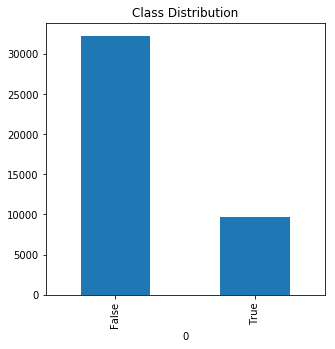

In [8]:
ax = y_train.groupby([0])[0].count().plot.bar(title="Class Distribution", figsize=(5,5))
y_train.groupby([0])[0].count()

In [9]:
X_train.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.0,-0.012,0.48,0.28,0.64,-0.053,0.37,0.52,1.0,-0.012,0.48,0.28,0.64,-0.052,0.37,0.52,1.0,-0.012,0.47,0.28,0.64,-0.05,0.37,0.52,0.99,-0.011,0.47,0.28,0.64,-0.049,0.37,0.52
1,-0.012,1.0,0.08,0.043,0.02,-0.0053,0.0039,0.02,-0.013,1.0,0.08,0.043,0.019,-0.0049,0.004,0.02,-0.013,0.99,0.08,0.044,0.02,-0.0044,0.0044,0.02,-0.013,0.99,0.081,0.044,0.02,-0.004,0.005,0.02
2,0.48,0.08,1.0,0.5,0.8,-0.16,0.56,0.88,0.48,0.08,1.0,0.49,0.8,-0.16,0.56,0.88,0.47,0.079,0.99,0.49,0.8,-0.16,0.56,0.88,0.47,0.078,0.99,0.49,0.8,-0.16,0.56,0.87
3,0.28,0.043,0.5,1.0,0.3,0.52,0.29,0.43,0.28,0.043,0.5,1.0,0.3,0.52,0.29,0.43,0.28,0.042,0.49,0.99,0.3,0.52,0.29,0.43,0.28,0.042,0.49,0.99,0.3,0.52,0.29,0.43
4,0.64,0.02,0.8,0.3,1.0,-0.25,0.54,0.86,0.64,0.019,0.8,0.3,1.0,-0.25,0.54,0.86,0.64,0.019,0.8,0.3,1.0,-0.24,0.54,0.86,0.63,0.018,0.79,0.3,0.99,-0.24,0.54,0.85
5,-0.053,-0.0053,-0.16,0.52,-0.25,1.0,-0.12,-0.12,-0.051,-0.0053,-0.16,0.52,-0.25,1.0,-0.12,-0.12,-0.05,-0.0052,-0.16,0.52,-0.25,1.0,-0.12,-0.12,-0.049,-0.0052,-0.16,0.52,-0.24,0.99,-0.12,-0.11
6,0.37,0.0039,0.56,0.29,0.54,-0.12,1.0,0.58,0.37,0.0031,0.56,0.29,0.54,-0.12,1.0,0.58,0.37,0.003,0.56,0.29,0.54,-0.12,0.99,0.58,0.37,0.0028,0.56,0.29,0.54,-0.12,0.99,0.58
7,0.52,0.02,0.88,0.43,0.86,-0.12,0.58,1.0,0.52,0.02,0.88,0.43,0.86,-0.12,0.58,1.0,0.52,0.019,0.88,0.43,0.86,-0.12,0.58,0.99,0.52,0.019,0.87,0.43,0.86,-0.11,0.58,0.99
8,1.0,-0.013,0.48,0.28,0.64,-0.051,0.37,0.52,1.0,-0.012,0.48,0.28,0.64,-0.05,0.37,0.52,1.0,-0.012,0.47,0.28,0.64,-0.049,0.37,0.52,0.99,-0.011,0.47,0.28,0.64,-0.047,0.37,0.52
9,-0.012,1.0,0.08,0.043,0.019,-0.0053,0.0031,0.02,-0.012,1.0,0.079,0.043,0.019,-0.0048,0.0034,0.019,-0.013,1.0,0.08,0.044,0.019,-0.0044,0.0038,0.019,-0.013,0.99,0.08,0.044,0.02,-0.004,0.0044,0.019


## Imbalanced baseline

In [10]:
%%time
LogisticRegr_(X_train, y_train, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5930455736101508
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6041704309115304
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6055577553695751
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5927292088742634
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6111930702014047
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5946204407090137
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5975028285113948
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5835430664911835
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6234318117096523
10 of KFold 10
ROC AUC score: 0.6010394298336759

CROSS VALIDANTION SUMMARY:
Mean: 0.6006833616221845
Std deviation: 0.010612544354238165

TEST SET:
F1-Score(micro): 0.6788674417311008
F1-Score(macro): 0.5859520926992966
F1-Score(weighted): 0.6936732341965962
F1-Score(None): [0.78209338 0.3898108 ]
Accuracy: 0.6788674417311008
Sensitivity: 0.4550839091806515
Specificity: 0.7439856373429085
Confusion Matrix: [0.7439856373429085, 0.46]
ROC AUC score: 0.59953477326178
CPU times: user 16.3 s, sys: 8.77 s, total: 25.1 s
Wall time: 3.24 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [11]:
%%time
DecisionTree_(X_train, y_train, X_test, y_test)

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 4.53 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6534684540278237
2 of KFold 10
ROC AUC score: 0.6606201681512208
3 of KFold 10
ROC AUC score: 0.6641326090605855
4 of KFold 10
ROC AUC score: 0.6586110224778278
5 of KFold 10
ROC AUC score: 0.6656359042965572
6 of KFold 10
ROC AUC score: 0.6644981412639405
7 of KFold 10
ROC AUC score: 0.6628395175752538
8 of KFold 10
ROC AUC score: 0.660996174775066
9 of KFold 10
ROC AUC score: 0.6633157465345926
10 of KFold 10
ROC AUC score: 0.6741660701778691

CROSS VALIDANTION SUMMARY:
Mean: 0.6628283808340737
Std deviation: 0.005047570423288452

TEST SET:
F1-Score(micro): 0.6687433943372086
F1-Score(macro): 0.5848825393784557
F1-Score(weighted): 0.6873526162358528
F1-Score(None): [0.77146256 0.39830252]
Accuracy: 0.6687433943372086
Sensitivity: 0.486426456071076
Specificity: 0.7217953321364452
Confusion Matrix: [0.7217953321364452, 0.49]
ROC AUC score: 0.6041108

In [12]:
%%time
RandomForest_(X_train, y_train, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6101600573653386
2 of KFold 10
ROC AUC score: 0.6039258350857094
3 of KFold 10
ROC AUC score: 0.6197909258312414
4 of KFold 10
ROC AUC score: 0.6154516324969341
5 of KFold 10
ROC AUC score: 0.6210869473287637
6 of KFold 10
ROC AUC score: 0.6039045002193539
7 of KFold 10
ROC AUC score: 0.6108824570720482
8 of KFold 10
ROC AUC score: 0.6080529835984823
9 of KFold 10
ROC AUC score: 0.6033378358616762
10 of KFold 10
ROC AUC score: 0.6153253365351312

CROSS VALIDANTION SUMMARY:
Mean: 0.6111918511394678
Std deviation: 0.006210372727228061

TEST SET:
F1-Score(micro): 0.7628080324859543
F1-Score(macro): 0.5948350517155322
F1-Score(weighted): 0.7381091112530163
F1-Score(None): [0.85571197 0.33395814]
Accuracy: 0.7628080324859543
Sensitivity: 0.2638203356367226
Specificity: 0.9080071813285457
Confusion Matrix: [0.9080071813285457, 0.26]
ROC AUC score: 0.58591375

In [13]:
%%time
NN_(X_train, y_train, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5927671057566143
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5984627144338127
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6057472490578176
4 of KFold 10
ROC AUC score: 0.5810329792700633
5 of KFold 10
ROC AUC score: 0.605544460377078
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5956161921694489
7 of KFold 10
ROC AUC score: 0.580911781230999
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5975807568865593
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6003197949617862
10 of KFold 10
ROC AUC score: 0.5940066344947549

CROSS VALIDANTION SUMMARY:
Mean: 0.5951989668638934
Std deviation: 0.008204583507350757

TEST SET:
F1-Score(micro): 0.8111475774600879
F1-Score(macro): 0.6115673200907468
F1-Score(weighted): 0.7644817916884112
F1-Score(None): [0.88999773 0.33313691]
Accuracy: 0.8111475774600879
Sensitivity: 0.20927936821322804
Specificity: 0.9862836624775584
Confusion Matrix: [0.9862836624775584, 0.21]
ROC AUC score: 0.5977815153453933
CPU times: user 24min 49s, sys: 11min 54s, total: 36min 44s
Wall time: 4min 36s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Undersampling

In [14]:
print("Resampling dataset using Random UnderSampling (RUS)...")
X_RUS, y_RUS = RandomUnderSampler(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y RUS:", len(X_RUS), len(y_RUS))

Resampling dataset using Random UnderSampling (RUS)...
... DONE!
X and Y RUS: 19330 19330


In [15]:
%%time
LogisticRegr_(X_RUS, y_RUS, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6016391724614095
2 of KFold 10
ROC AUC score: 0.5910918548302269
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6107458140660073
4 of KFold 10
ROC AUC score: 0.5750843765001292
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6076136665133373
6 of KFold 10
ROC AUC score: 0.6003200808625336
7 of KFold 10
ROC AUC score: 0.5930982721727188
8 of KFold 10
ROC AUC score: 0.6098335582546108
9 of KFold 10
ROC AUC score: 0.600679347826087
10 of KFold 10
ROC AUC score: 0.6028269269880008

CROSS VALIDANTION SUMMARY:
Mean: 0.599293307047506
Std deviation: 0.010120102350813082

TEST SET:
F1-Score(micro): 0.6796462146075541
F1-Score(macro): 0.5853162873288638
F1-Score(weighted): 0.693937627662723
F1-Score(None): [0.78309668 0.38753589]
Accuracy: 0.6796462146075541
Sensitivity: 0.44965449160908194
Specificity: 0.7465709156193896
Confusion Matrix: [0.7465709156193896, 0.45]
ROC AUC score: 0.5981127036142357
CPU times: user 8.54 s, sys: 4.38 s, total: 12.9 s
Wall time: 1.64 s


In [16]:
%%time
DecisionTree_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 9 µs, sys: 3 µs, total: 12 µs
Wall time: 5.01 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6294277383242097
2 of KFold 10
ROC AUC score: 0.6101277205998913
3 of KFold 10
ROC AUC score: 0.6222855873791413
4 of KFold 10
ROC AUC score: 0.5782112920497765
5 of KFold 10
ROC AUC score: 0.6123226573182852
6 of KFold 10
ROC AUC score: 0.5989934299191375
7 of KFold 10
ROC AUC score: 0.6070550285842037
8 of KFold 10
ROC AUC score: 0.5968600989653622
9 of KFold 10
ROC AUC score: 0.6184103260869566
10 of KFold 10
ROC AUC score: 0.6265044177795855

CROSS VALIDANTION SUMMARY:
Mean: 0.6100198297006549
Std deviation: 0.01479832955473535

TEST SET:
F1-Score(micro): 0.6655170495633309
F1-Score(macro): 0.5647445605895218
F1-Score(weighted): 0.6797649980043677
F1-Score(None): [0.77417659 0.35531253]
Accuracy: 0.6655170495633309
Sensitivity: 0.40893385982230995
Specificity: 0.7401795332136445
Confusion Matrix: [0.7401795332136445, 0.41]
ROC AUC score: 0.574556

In [17]:
%%time
RandomForest_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5787021625487004
2 of KFold 10
ROC AUC score: 0.5691403859914754
3 of KFold 10
ROC AUC score: 0.581366149257993
4 of KFold 10
ROC AUC score: 0.5421985894169344
5 of KFold 10
ROC AUC score: 0.5692258541570836
6 of KFold 10
ROC AUC score: 0.5609417115902965
7 of KFold 10
ROC AUC score: 0.587764683338124
8 of KFold 10
ROC AUC score: 0.5655375618533514
9 of KFold 10
ROC AUC score: 0.5697690217391305
10 of KFold 10
ROC AUC score: 0.5746955008699974

CROSS VALIDANTION SUMMARY:
Mean: 0.5699341620763086
Std deviation: 0.011911260641518859

TEST SET:
F1-Score(micro): 0.752517105189965
F1-Score(macro): 0.563711350664028
F1-Score(weighted): 0.7213368550133071
F1-Score(None): [0.85071973 0.27670298]
Accuracy: 0.752517105189965
Sensitivity: 0.21001974333662388
Specificity: 0.9103770197486535
Confusion Matrix: [0.9103770197486535, 0.21]
ROC AUC score: 0.5601

In [18]:
%%time
NN_(X_RUS, y_RUS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5745348794200326
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5850547194102422
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5746861045234262
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5598862671245523
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5664258924632598
6 of KFold 10
ROC AUC score: 0.5593413072776281
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5581265369997764
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5628160143949618
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5682065217391304
10 of KFold 10
ROC AUC score: 0.5647458929338123

CROSS VALIDANTION SUMMARY:
Mean: 0.5673824136286821
Std deviation: 0.008079184645761212

TEST SET:
F1-Score(micro): 0.7962952661734437
F1-Score(macro): 0.5534542567150313
F1-Score(weighted): 0.7343073370788321
F1-Score(None): [0.88275597 0.22415254]
Accuracy: 0.7962952661734438
Sensitivity: 0.1305528134254689
Specificity: 0.9900179533213644
Confusion Matrix: [0.9900179533213644, 0.13]
ROC AUC score: 0.5602853833734167
CPU times: user 8min 37s, sys: 4min 39s, total: 13min 16s
Wall time: 1min 39s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
print("Resampling dataset using Edited Nearest Neighbour (ENN)...")
X_ENN, y_ENN = EditedNearestNeighbours(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y ENN:", len(X_ENN), len(y_ENN))

Resampling dataset using Edited Nearest Neighbour (ENN)...
... DONE!
X and Y ENN: 29580 29580


In [20]:
%%time
LogisticRegr_(X_ENN, y_ENN, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6083635147793373
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.591584286193635
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5926634768740032
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6073051667806884
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5993761370156989
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5981645593255479
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6036334931709321
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5952666592207745
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5915942807774479
10 of KFold 10
ROC AUC score: 0.6010015849998314

CROSS VALIDANTION SUMMARY:
Mean: 0.5988953159137896
Std deviation: 0.0058888326985227

TEST SET:
F1-Score(micro): 0.6773655226122267
F1-Score(macro): 0.5847762103759968
F1-Score(weighted): 0.6924607762504577
F1-Score(None): [0.7808509  0.38870152]
Accuracy: 0.6773655226122267
Sensitivity: 0.4550839091806515
Specificity: 0.7420466786355476
Confusion Matrix: [0.7420466786355476, 0.46]
ROC AUC score: 0.5985652939080994
CPU times: user 12.2 s, sys: 6.25 s, total: 18.5 s
Wall time: 2.35 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [21]:
%%time
DecisionTree_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 12 µs, sys: 5 µs, total: 17 µs
Wall time: 4.53 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6486168219766869
2 of KFold 10
ROC AUC score: 0.6295634050021939
3 of KFold 10
ROC AUC score: 0.6440807597506162
4 of KFold 10
ROC AUC score: 0.6385433783239451
5 of KFold 10
ROC AUC score: 0.6520969978925809
6 of KFold 10
ROC AUC score: 0.6254318665002943
7 of KFold 10
ROC AUC score: 0.6313107729495139
8 of KFold 10
ROC AUC score: 0.6342362761296253
9 of KFold 10
ROC AUC score: 0.6466334706453317
10 of KFold 10
ROC AUC score: 0.6451957773114149

CROSS VALIDANTION SUMMARY:
Mean: 0.6395709526482204
Std deviation: 0.008592995709380578

TEST SET:
F1-Score(micro): 0.6667408355120432
F1-Score(macro): 0.5811093149149359
F1-Score(weighted): 0.6851250632977164
F1-Score(None): [0.77050373 0.39171489]
Accuracy: 0.6667408355120432
Sensitivity: 0.47606120434353405
Specificity: 0.7222262118491921
Confusion Matrix: [0.7222262118491921, 0.48]
ROC AUC score: 0.5991

In [22]:
%%time
RandomForest_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.584267490562715
2 of KFold 10
ROC AUC score: 0.6028072813153345
3 of KFold 10
ROC AUC score: 0.5852798318109322
4 of KFold 10
ROC AUC score: 0.5975253032230841
5 of KFold 10
ROC AUC score: 0.5980773337930715
6 of KFold 10
ROC AUC score: 0.5919378266765047
7 of KFold 10
ROC AUC score: 0.58488625632091
8 of KFold 10
ROC AUC score: 0.599280059259031
9 of KFold 10
ROC AUC score: 0.594058285170044
10 of KFold 10
ROC AUC score: 0.6040000492880472

CROSS VALIDANTION SUMMARY:
Mean: 0.5942119717419675
Std deviation: 0.007015202507471768

TEST SET:
F1-Score(micro): 0.755632196695778
F1-Score(macro): 0.579325746299256
F1-Score(weighted): 0.7288938494754771
F1-Score(None): [0.85166301 0.30698848]
Accuracy: 0.755632196695778
Sensitivity: 0.24012833168805528
Specificity: 0.9056373429084381
Confusion Matrix: [0.9056373429084381, 0.24]
ROC AUC score: 0.572882837298246

In [23]:
%%time
NN_(X_ENN, y_ENN, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6011333675347182
2 of KFold 10
ROC AUC score: 0.5733338925741424
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5780919240249384
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5910631509625774
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5951625852038073
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.574520552531578
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5761259263909926
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5841459625933786
9 of KFold 10
ROC AUC score: 0.5646291274919785
10 of KFold 10
ROC AUC score: 0.5879895405575775

CROSS VALIDANTION SUMMARY:
Mean: 0.5826196029865689
Std deviation: 0.010680305910413704

TEST SET:
F1-Score(micro): 0.8038048617678144
F1-Score(macro): 0.5804976189679563
F1-Score(weighted): 0.7485909712219208
F1-Score(None): [0.88656611 0.27442913]
Accuracy: 0.8038048617678144
Sensitivity: 0.1646100691016782
Specificity: 0.989802513464991
Confusion Matrix: [0.989802513464991, 0.16]
ROC AUC score: 0.5772062912833347
CPU times: user 15min 35s, sys: 7min 54s, total: 23min 29s
Wall time: 2min 56s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
print("Resampling dataset using Tomek's Link (TL)...")
X_TL, y_TL = TomekLinks(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y TL:", len(X_TL), len(y_TL))

Resampling dataset using Tomek's Link (TL)...
... DONE!
X and Y TL: 40579 40579


In [25]:
%%time
LogisticRegr_(X_TL, y_TL, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5954402060308697
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6023549205381091
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.605852903597208
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5960679801306021
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6072953483386924
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5999590279205115
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5970868052497753
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5716624621473719
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6263529817304377
10 of KFold 10
ROC AUC score: 0.6036155147652752

CROSS VALIDANTION SUMMARY:
Mean: 0.6005688150448854
Std deviation: 0.01282613449718632

TEST SET:
F1-Score(micro): 0.6780886688546476
F1-Score(macro): 0.5855667398957759
F1-Score(weighted): 0.6931095942177611
F1-Score(None): [0.7813834  0.38975008]
Accuracy: 0.6780886688546476
Sensitivity: 0.456071076011846
Specificity: 0.7426929982046678
Confusion Matrix: [0.7426929982046678, 0.46]
ROC AUC score: 0.599382037108257
CPU times: user 17.5 s, sys: 8.14 s, total: 25.6 s
Wall time: 3.26 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [26]:
%%time
DecisionTree_(X_TL, y_TL, X_test, y_test)

CPU times: user 9 µs, sys: 4 µs, total: 13 µs
Wall time: 5.01 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6519010046796646
2 of KFold 10
ROC AUC score: 0.67207432615069
3 of KFold 10
ROC AUC score: 0.655046692283628
4 of KFold 10
ROC AUC score: 0.6526204163643465
5 of KFold 10
ROC AUC score: 0.6801455948553056
6 of KFold 10
ROC AUC score: 0.6696151126123691
7 of KFold 10
ROC AUC score: 0.6592264213714891
8 of KFold 10
ROC AUC score: 0.6626855231330535
9 of KFold 10
ROC AUC score: 0.6494009430962875
10 of KFold 10
ROC AUC score: 0.6467777555335894

CROSS VALIDANTION SUMMARY:
Mean: 0.6599493790080423
Std deviation: 0.01040972891724576

TEST SET:
F1-Score(micro): 0.6685208878010792
F1-Score(macro): 0.5811105325838795
F1-Score(weighted): 0.6862009413831259
F1-Score(None): [0.77246172 0.38975934]
Accuracy: 0.6685208878010792
Sensitivity: 0.46964461994077
Specificity: 0.7263913824057451
Confusion Matrix: [0.7263913824057451, 0.47]
ROC AUC score: 0.598018001173

In [27]:
%%time
RandomForest_(X_TL, y_TL, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6053861508450267
2 of KFold 10
ROC AUC score: 0.6073030086704602
3 of KFold 10
ROC AUC score: 0.6246289718508468
4 of KFold 10
ROC AUC score: 0.6169559636099793
5 of KFold 10
ROC AUC score: 0.6200238370846731
6 of KFold 10
ROC AUC score: 0.6021000895165565
7 of KFold 10
ROC AUC score: 0.6070966531214749
8 of KFold 10
ROC AUC score: 0.6139498162785598
9 of KFold 10
ROC AUC score: 0.6100034136203452
10 of KFold 10
ROC AUC score: 0.6035619896870382

CROSS VALIDANTION SUMMARY:
Mean: 0.611100989428496
Std deviation: 0.007121770790446688

TEST SET:
F1-Score(micro): 0.7604160872225622
F1-Score(macro): 0.5909993727722405
F1-Score(weighted): 0.735567326252623
F1-Score(None): [0.85423224 0.32776651]
Accuracy: 0.7604160872225622
Sensitivity: 0.2591312931885489
Specificity: 0.9062836624775583
Confusion Matrix: [0.9062836624775583, 0.26]
ROC AUC score: 0.5827074778

In [28]:
%%time
NN_(X_TL, y_TL, X_test, y_test)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6075563845490807
2 of KFold 10
ROC AUC score: 0.5882323281329055
3 of KFold 10
ROC AUC score: 0.5864553864199474
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5899215828542725
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5906953054662379
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5959848714315077
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5942951188384404
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5947570908142013
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6069614428235326
10 of KFold 10
ROC AUC score: 0.5898842468048309

CROSS VALIDANTION SUMMARY:
Mean: 0.5944743758134956
Std deviation: 0.006991461819917913

TEST SET:
F1-Score(micro): 0.8119819769705735
F1-Score(macro): 0.6134736939064702
F1-Score(weighted): 0.7656022570277845
F1-Score(None): [0.8904731  0.33647428]
Accuracy: 0.8119819769705735
Sensitivity: 0.2115004935834156
Specificity: 0.9867145421903052
Confusion Matrix: [0.9867145421903052, 0.21]
ROC AUC score: 0.5991075178868603
CPU times: user 25min 6s, sys: 12min 8s, total: 37min 14s
Wall time: 4min 40s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Oversampling

In [29]:
print("Resampling dataset using Random OverSampling (ROS)...")
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)
print("X and Y ROS:", len(X_ROS), len(y_ROS))

Resampling dataset using Random OverSampling (ROS)...
X and Y ROS: 64562 64562


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
%%time
LogisticRegr_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 14 µs, sys: 7 µs, total: 21 µs
Wall time: 5.25 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5955404149891607
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5977385377942999
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6019206939281289
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6030049566294919
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6017657992565055
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5968091697645601
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5991325898389096
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6085811648079306
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6104399008674101
10 of KFold 10
ROC AUC score: 0.5995972738537795

CROSS VALIDANTION SUMMARY:
Mean: 0.6014530501730178
Std deviation: 0.004620057836852541

TEST SET:
F1-Score(micro): 0.6780330422206152
F1-Score(macro): 0.5859151001057438
F1-Score(weighted): 0.6931778011907922
F1-Score(None): [0.78122165 0.39060855]
Accuracy: 0.6780330422206152
Sensitivity: 0.45779861796643634
Specificity: 0.7421184919210054
Confusion Matrix: [0.7421184919210054, 0.46]
ROC AUC score: 0.5999585549437207
CPU times: user 28.6 s, sys: 14 s, total: 42.7 s
Wall time: 5.4 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [31]:
%%time
DecisionTree_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 12 µs, sys: 4 µs, total: 16 µs
Wall time: 4.77 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8129451842675751
2 of KFold 10
ROC AUC score: 0.8144361833952911
3 of KFold 10
ROC AUC score: 0.8183085501858736
4 of KFold 10
ROC AUC score: 0.837360594795539
5 of KFold 10
ROC AUC score: 0.8327137546468402
6 of KFold 10
ROC AUC score: 0.8356567534076828
7 of KFold 10
ROC AUC score: 0.8379801734820322
8 of KFold 10
ROC AUC score: 0.8337980173482031
9 of KFold 10
ROC AUC score: 0.837360594795539
10 of KFold 10
ROC AUC score: 0.8427819083023543

CROSS VALIDANTION SUMMARY:
Mean: 0.8303341714626932
Std deviation: 0.010285318368337557

TEST SET:
F1-Score(micro): 0.6755298436891584
F1-Score(macro): 0.5864880241745951
F1-Score(weighted): 0.6918716113320253
F1-Score(None): [0.77837304 0.39460301]
Accuracy: 0.6755298436891584
Sensitivity: 0.46915103652517276
Specificity: 0.7355834829443447
Confusion Matrix: [0.7355834829443447, 0.47]
ROC AUC score: 0.602367

In [32]:
%%time
RandomForest_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7985444410034066
2 of KFold 10
ROC AUC score: 0.801734820322181
3 of KFold 10
ROC AUC score: 0.807001239157373
4 of KFold 10
ROC AUC score: 0.825278810408922
5 of KFold 10
ROC AUC score: 0.8203221809169765
6 of KFold 10
ROC AUC score: 0.8251239157372986
7 of KFold 10
ROC AUC score: 0.8197026022304832
8 of KFold 10
ROC AUC score: 0.8197026022304833
9 of KFold 10
ROC AUC score: 0.8220260223048326
10 of KFold 10
ROC AUC score: 0.8320941759603468

CROSS VALIDANTION SUMMARY:
Mean: 0.8171530810272303
Std deviation: 0.01042425541395475

TEST SET:
F1-Score(micro): 0.7297101852366913
F1-Score(macro): 0.6187598731807263
F1-Score(weighted): 0.7317122789271217
F1-Score(None): [0.82442638 0.41309337]
Accuracy: 0.7297101852366913
Sensitivity: 0.4220138203356367
Specificity: 0.819245960502693
Confusion Matrix: [0.819245960502693, 0.42]
ROC AUC score: 0.62062989041916

In [33]:
%%time
NN_NoIloc(X_ROS, y_ROS, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6393620315887272
2 of KFold 10
ROC AUC score: 0.6497831474597273
3 of KFold 10
ROC AUC score: 0.6621747211895911
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6579925650557621
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.654275092936803
6 of KFold 10
ROC AUC score: 0.6426579925650557
7 of KFold 10
ROC AUC score: 0.6459107806691451
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.641728624535316
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6316604708798017
10 of KFold 10
ROC AUC score: 0.6528810408921933

CROSS VALIDANTION SUMMARY:
Mean: 0.6478426467772123
Std deviation: 0.008835916389709597

TEST SET:
F1-Score(micro): 0.5502030372142181
F1-Score(macro): 0.5279999117317562
F1-Score(weighted): 0.5842223938780365
F1-Score(None): [0.63037118 0.42562864]
Accuracy: 0.5502030372142181
Sensitivity: 0.7393879565646594
Specificity: 0.4951526032315978
Confusion Matrix: [0.4951526032315978, 0.74]
ROC AUC score: 0.6172702798981287
CPU times: user 45min 31s, sys: 21min 16s, total: 1h 6min 48s
Wall time: 8min 22s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
print("Resampling dataset using SMOTE (SMO)...")
sm = SMOTE(random_state=42)
X_SMO, y_SMO = sm.fit_resample(X_train, y_train)
print("X and Y SMO:", len(X_SMO), len(y_SMO))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Resampling dataset using SMOTE (SMO)...
X and Y SMO: 64562 64562


In [35]:
%%time
LogisticRegr_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5986373490244659
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5977385377942999
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6011462205700123
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6016109045848822
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6085811648079307
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.599907063197026
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.604553903345725
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6053283767038414
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.6099752168525403
10 of KFold 10
ROC AUC score: 0.6073420074349443

CROSS VALIDANTION SUMMARY:
Mean: 0.6034820744315669
Std deviation: 0.0040720526251066215

TEST SET:
F1-Score(micro): 0.6769761361740001
F1-Score(macro): 0.5849755606647811
F1-Score(weighted): 0.6922914493701828
F1-Score(None): [0.78037896 0.38957216]
Accuracy: 0.6769761361740001
Sensitivity: 0.4573050345508391
Specificity: 0.7408976660682226
Confusion Matrix: [0.7408976660682226, 0.46]
ROC AUC score: 0.5991013503095308
CPU times: user 28.2 s, sys: 13.9 s, total: 42.1 s
Wall time: 5.33 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [36]:
%%time
DecisionTree_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 15 µs, sys: 8 µs, total: 23 µs
Wall time: 5.72 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6991328584701146
2 of KFold 10
ROC AUC score: 0.7015179677819083
3 of KFold 10
ROC AUC score: 0.7118959107806692
4 of KFold 10
ROC AUC score: 0.866635687732342
5 of KFold 10
ROC AUC score: 0.8694237918215613
6 of KFold 10
ROC AUC score: 0.8647769516728624
7 of KFold 10
ROC AUC score: 0.864002478314746
8 of KFold 10
ROC AUC score: 0.8565675340768277
9 of KFold 10
ROC AUC score: 0.8736059479553903
10 of KFold 10
ROC AUC score: 0.8630731102850061

CROSS VALIDANTION SUMMARY:
Mean: 0.8170632238891427
Std deviation: 0.07407561847757035

TEST SET:
F1-Score(micro): 0.3863825999888747
F1-Score(macro): 0.38606946120010827
F1-Score(weighted): 0.3936842869673255
F1-Score(None): [0.39993472 0.3722042 ]
Accuracy: 0.3863825999888747
Sensitivity: 0.8070088845014808
Specificity: 0.2639856373429084
Confusion Matrix: [0.2639856373429084, 0.81]
ROC AUC score: 0.5354972

In [37]:
%%time
RandomForest_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6927841436977392
2 of KFold 10
ROC AUC score: 0.6897459727385379
3 of KFold 10
ROC AUC score: 0.6990396530359356
4 of KFold 10
ROC AUC score: 0.8731412639405205
5 of KFold 10
ROC AUC score: 0.8805762081784386
6 of KFold 10
ROC AUC score: 0.8742255266418836
7 of KFold 10
ROC AUC score: 0.8672552664188351
8 of KFold 10
ROC AUC score: 0.8680297397769516
9 of KFold 10
ROC AUC score: 0.8759293680297398
10 of KFold 10
ROC AUC score: 0.881815365551425

CROSS VALIDANTION SUMMARY:
Mean: 0.8202542508010007
Std deviation: 0.0828877392739109

TEST SET:
F1-Score(micro): 0.35100406074428436
F1-Score(macro): 0.3488997240212351
F1-Score(weighted): 0.3285708429383922
F1-Score(None): [0.3118844  0.38591505]
Accuracy: 0.35100406074428436
Sensitivity: 0.9047384007897334
Specificity: 0.18987432675044882
Confusion Matrix: [0.18987432675044882, 0.9]
ROC AUC score: 0.54730636

In [38]:
%%time
NN_NoIloc(X_SMO, y_SMO, X_test, y_test)

CPU times: user 0 ns, sys: 2 µs, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6432331991328584
2 of KFold 10
ROC AUC score: 0.6324349442379181
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6541201982651796
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6486988847583643
5 of KFold 10
ROC AUC score: 0.6677509293680297
6 of KFold 10
ROC AUC score: 0.6521065675340767
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6550495662949194
8 of KFold 10
ROC AUC score: 0.6561338289962826
9 of KFold 10
ROC AUC score: 0.655359355638166
10 of KFold 10
ROC AUC score: 0.6531908302354399

CROSS VALIDANTION SUMMARY:
Mean: 0.6518078304461234
Std deviation: 0.00872849581469945

TEST SET:
F1-Score(micro): 0.6080547366078879
F1-Score(macro): 0.5664151956259569
F1-Score(weighted): 0.6402093417603321
F1-Score(None): [0.70078138 0.43204901]
Accuracy: 0.6080547366078879
Sensitivity: 0.6614017769002961
Specificity: 0.5925314183123878
Confusion Matrix: [0.5925314183123878, 0.66]
ROC AUC score: 0.626966597606342
CPU times: user 39min 42s, sys: 18min 37s, total: 58min 19s
Wall time: 7min 18s


In [39]:
print("Resampling dataset using ADASYN (ADA)...")
ada = ADASYN(random_state=42)
X_ADA, y_ADA = ada.fit_resample(X_train, y_train)
print("X and Y ADA:", len(X_ADA), len(y_ADA))

Resampling dataset using ADASYN (ADA)...


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X and Y ADA: 63862 63862


In [40]:
%%time
LogisticRegr_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5963305302109886
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5961453494714157
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5978148570181904
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.592893346140837
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5926007237181314
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5704412702971859
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5885013611896539
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5742033764095513
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5814490921347646
10 of KFold 10
ROC AUC score: 0.5837167932898726

CROSS VALIDANTION SUMMARY:
Mean: 0.5874096699880591
Std deviation: 0.009131647703157584

TEST SET:
F1-Score(micro): 0.6613450520109028
F1-Score(macro): 0.5762211388581185
F1-Score(weighted): 0.6805314770184063
F1-Score(None): [0.76615196 0.38629032]
Accuracy: 0.6613450520109028
Sensitivity: 0.472852912142152
Specificity: 0.7161938958707361
Confusion Matrix: [0.7161938958707361, 0.47]
ROC AUC score: 0.5945234040064441
CPU times: user 28.1 s, sys: 12.6 s, total: 40.7 s
Wall time: 5.15 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [41]:
%%time
DecisionTree_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 9 µs, sys: 4 µs, total: 13 µs
Wall time: 5.01 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7330982545703305
2 of KFold 10
ROC AUC score: 0.7108654050647714
3 of KFold 10
ROC AUC score: 0.717064232927056
4 of KFold 10
ROC AUC score: 0.8453545920629577
5 of KFold 10
ROC AUC score: 0.8419297423667043
6 of KFold 10
ROC AUC score: 0.8441982282953229
7 of KFold 10
ROC AUC score: 0.8498564453056027
8 of KFold 10
ROC AUC score: 0.8416645870168641
9 of KFold 10
ROC AUC score: 0.8470992416733568
10 of KFold 10
ROC AUC score: 0.8619931638379505

CROSS VALIDANTION SUMMARY:
Mean: 0.8093123893120918
Std deviation: 0.05872280191544273

TEST SET:
F1-Score(micro): 0.36435445291205426
F1-Score(macro): 0.36411065362064304
F1-Score(weighted): 0.3572724990635309
F1-Score(None): [0.35165957 0.37656173]
Accuracy: 0.3643544529120543
Sensitivity: 0.8516781836130306
Specificity: 0.22254937163375224
Confusion Matrix: [0.22254937163375224, 0.85]
ROC AUC score: 0.5371

In [42]:
%%time
RandomForest_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6986725828988656
2 of KFold 10
ROC AUC score: 0.689845540877675
3 of KFold 10
ROC AUC score: 0.7008014695668756
4 of KFold 10
ROC AUC score: 0.8419053162911918
5 of KFold 10
ROC AUC score: 0.8546200205139796
6 of KFold 10
ROC AUC score: 0.8588708443299722
7 of KFold 10
ROC AUC score: 0.8519383513321137
8 of KFold 10
ROC AUC score: 0.848916384736783
9 of KFold 10
ROC AUC score: 0.8522309737548195
10 of KFold 10
ROC AUC score: 0.8671107699962253

CROSS VALIDANTION SUMMARY:
Mean: 0.8064912254298502
Std deviation: 0.07235174654105701

TEST SET:
F1-Score(micro): 0.3545641653223564
F1-Score(macro): 0.3526007682818642
F1-Score(weighted): 0.3330203450689567
F1-Score(None): [0.31694825 0.38825328]
Accuracy: 0.35456416532235635
Sensitivity: 0.9086870681145114
Specificity: 0.1933213644524237
Confusion Matrix: [0.1933213644524237, 0.91]
ROC AUC score: 0.5510042162

In [43]:
%%time
NN_NoIloc(X_ADA, y_ADA, X_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6447186294748319
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6443626187264225
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6608249107516325
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6333826563484646
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6304614350525367
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6178596401185635
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6315960213552568
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6246475385971232
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.626591716872552
10 of KFold 10
ROC AUC score: 0.6344947785094482

CROSS VALIDANTION SUMMARY:
Mean: 0.6348939945806833
Std deviation: 0.011643218381866735

TEST SET:
F1-Score(micro): 0.6841519719641764
F1-Score(macro): 0.610040642747105
F1-Score(weighted): 0.7034055978779137
F1-Score(None): [0.78004184 0.44003945]
Accuracy: 0.6841519719641764
Sensitivity: 0.5505923000987167
Specificity: 0.723016157989228
Confusion Matrix: [0.723016157989228, 0.55]
ROC AUC score: 0.6368042290439724
CPU times: user 52min 13s, sys: 23min 43s, total: 1h 15min 56s
Wall time: 9min 34s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
